In [145]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [146]:
data = pd.read_csv('House Price Prediction Dataset.csv')
data.head()

Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056

In [147]:
print(f"Dimensi Pada DataFrame : {data.shape}")

Dimensi Pada DataFrame : (2000, 10)


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [149]:
print(f"Check Data Kosong : \n{data.isnull().sum()}")

Check Data Kosong : 
Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [150]:
print(f"Check Data Kosong Pada DataFrame : {data.isnull().sum().sum()}")

Check Data Kosong Pada DataFrame : 0


In [151]:
print(f"Jumlah Nilai Unik : \n{data.nunique()}")

Jumlah Nilai Unik : 
Id           2000
Area         1622
Bedrooms        5
Bathrooms       4
Floors          3
YearBuilt     124
Location        4
Condition       4
Garage          2
Price        1999
dtype: int64


In [152]:
for col in data:
    print({col : data[col].unique()})

{'Id': array([   1,    2,    3, ..., 1998, 1999, 2000], dtype=int64)}
{'Area': array([1360, 4272, 3592, ...,  865, 2174, 4062], dtype=int64)}
{'Bedrooms': array([5, 2, 4, 1, 3], dtype=int64)}
{'Bathrooms': array([4, 2, 1, 3], dtype=int64)}
{'Floors': array([3, 2, 1], dtype=int64)}
{'YearBuilt': array([1970, 1958, 1938, 1902, 1975, 1906, 1948, 1925, 1932, 2000, 1947,
       1978, 1901, 2004, 1931, 1903, 1919, 2013, 2016, 1935, 1927, 1976,
       1900, 1959, 1955, 1934, 2011, 1929, 1953, 2020, 1954, 1988, 1979,
       1957, 1982, 1964, 1968, 1950, 1921, 1987, 2006, 2008, 2015, 1952,
       1999, 1967, 1951, 1981, 1949, 1940, 1917, 1965, 1920, 1943, 2002,
       1946, 1928, 1989, 1984, 1916, 1930, 2014, 1972, 1994, 1977, 2009,
       1913, 1996, 1998, 2010, 1983, 2022, 1915, 1911, 2018, 1904, 1980,
       2021, 2005, 1973, 1942, 1944, 1908, 1961, 1956, 1924, 1914, 1905,
       2019, 1941, 1992, 1974, 1963, 2001, 1991, 1936, 1907, 1997, 2007,
       2017, 1966, 1945, 1912, 1986, 1960, 1995

In [153]:
def remove_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR = q3 - q1
    # batas awal dan akhir
    lw = q1 - 1.5 * IQR
    hg = q3 + 1.5 * IQR
    # outliers
    outlier = data[(data[column] < lw) & (data[column] > hg)]

    return outlier

In [154]:
remove_outliers(data, "YearBuilt")

Empty DataFrame
Columns: [Id, Area, Bedrooms, Bathrooms, Floors, YearBuilt, Location, Condition, Garage, Price]
Index: []

In [155]:
data = data[['Location','Price','YearBuilt']]

In [156]:
data

Location   Price  YearBuilt
0     Downtown  149919       1970
1     Downtown  424998       1958
2     Downtown  266746       1938
3     Suburban  244020       1902
4     Downtown  636056       1975
...        ...     ...        ...
1995  Suburban  295620       1923
1996  Suburban  580929       2019
1997     Rural  476925       1903
1998     Urban  161119       1936
1999  Suburban  482525       1903

[2000 rows x 3 columns]

In [157]:
data['Location'].value_counts()

Location
Downtown    558
Urban       485
Suburban    483
Rural       474
Name: count, dtype: int64

In [158]:
# Seimbangkan Data
data = data.groupby('Location').apply(lambda x: x.sample(474)).reset_index(drop=True)

In [159]:
data['Location'].value_counts()

Location
Downtown    474
Rural       474
Suburban    474
Urban       474
Name: count, dtype: int64

In [160]:
data['Location'] = data['Location'].map({'Downtown' : 0, 'Rural' : 1, 'Suburban' : 2, 'Urban' : 3})

<Axes: >

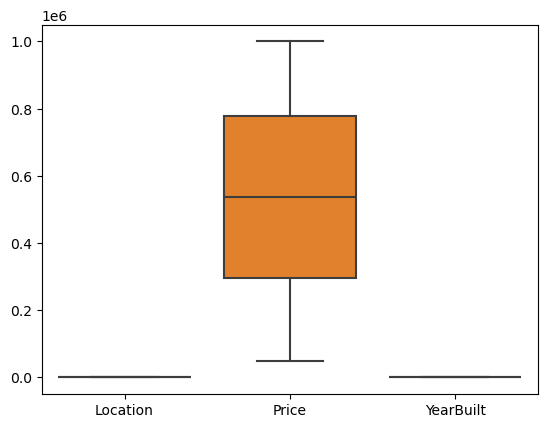

In [161]:
sns.boxplot(data)

<Axes: >

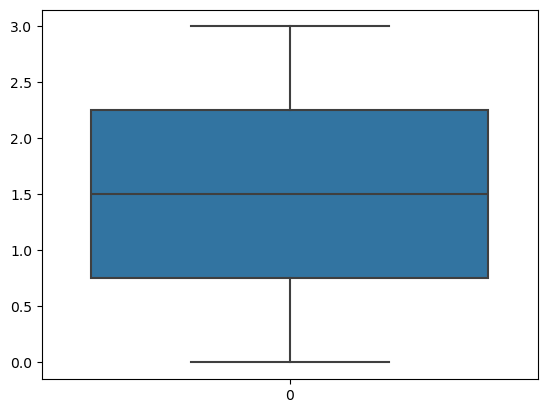

In [162]:
sns.boxplot(data['Location'])

<Axes: >

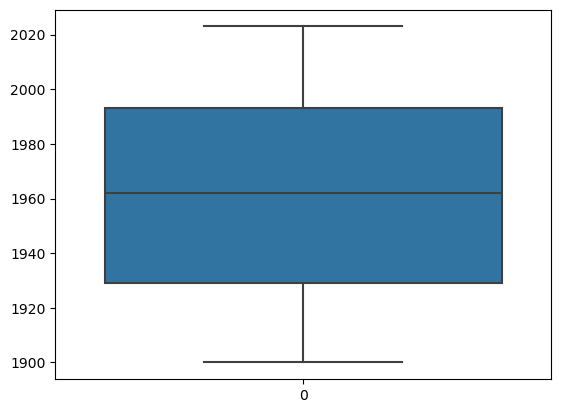

In [163]:
sns.boxplot(data['YearBuilt'])

C:\Users\BISMILLAH NAWAITU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\BISMILLAH NAWAITU\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


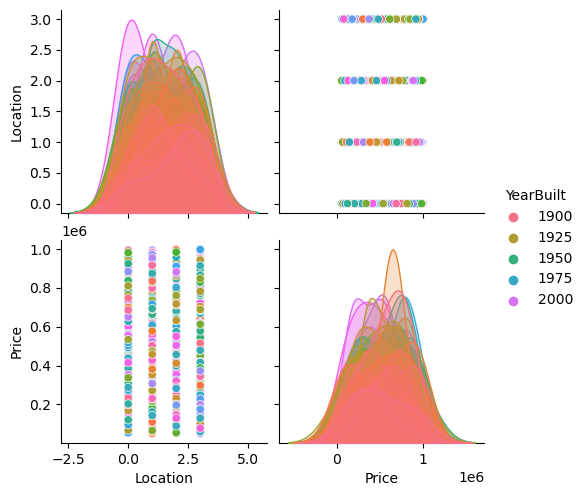

In [164]:
sns.pairplot(data=data, hue='YearBuilt', palette='husl')

In [165]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [166]:
X

Location   Price
0            0  826653
1            0  687293
2            0  244451
3            0  976932
4            0  863819
...        ...     ...
1891         3  612347
1892         3  176298
1893         3  372111
1894         3   77597
1895         3  174697

[1896 rows x 2 columns]

In [167]:
y

0       1949
1       2004
2       1998
3       2014
4       1921
        ... 
1891    1937
1892    1956
1893    1991
1894    2009
1895    1986
Name: YearBuilt, Length: 1896, dtype: int64

In [168]:
def scaling(X):
    return (X - X.min()) / (X.max() - X.min())

In [169]:
scaling = scaling(X)

In [170]:
scaling

Location     Price
0          0.0  0.817825
1          0.0  0.671076
2          0.0  0.204755
3          0.0  0.976071
4          0.0  0.856961
...        ...       ...
1891       1.0  0.592156
1892       1.0  0.132989
1893       1.0  0.339184
1894       1.0  0.029055
1895       1.0  0.131303

[1896 rows x 2 columns]

In [171]:
X = np.array(X)
y = np.array(y)

In [172]:
X.shape

(1896, 2)

In [173]:
y.shape

(1896,)

In [174]:
np.random.seed(42)
train_size = int(len(X) * 0.8)
idx = np.random.permutation(len(X))

X_train, X_test = X[idx[:train_size]], X[idx[train_size:]]
y_train, y_test = y[idx[:train_size]], y[idx[train_size:]]

In [175]:
print(f"Hasil Data Training : {X_train.shape}, {y_train.shape}")

Hasil Data Training : (1516, 2), (1516,)


In [176]:
print(f"Hasil Data Testing : {X_test.shape}, {y_test.shape}")

Hasil Data Testing : (380, 2), (380,)


In [177]:
# Perkalian Tranpose
x_transpose = X.T

In [178]:
x_transpose

array([[     0,      0,      0, ...,      3,      3,      3],
       [826653, 687293, 244451, ..., 372111,  77597, 174697]], dtype=int64)

In [179]:
### Perkalian X.T dengan X
x_tranpose_x = np.dot(x_transpose, X)

In [180]:
x_tranpose_x

array([[           6636,      1517292869],
       [     1517292869, 689202782818569]], dtype=int64)

In [181]:
# Perklaian X.T dengan Y
x_tranpose_y = np.dot(x_transpose, y)

In [182]:
x_tranpose_y

array([      5575089, 1991576766877], dtype=int64)

In [184]:
# Menghitung Slope dan Intercept
slope = np.linalg.inv(x_tranpose_x).dot(x_tranpose_y)
intercept = (np.sum(y) - np.dot(slope, np.sum(X, axis=0))) / len(X)

In [185]:
slope

array([3.61262541e+02, 2.09435557e-03])

In [186]:
intercept

297.9861010800026

In [187]:
# Prediksi 
y_pred = np.round(np.dot(X_test, slope) + intercept)

In [188]:
y_pred

array([2777., 2765., 1182., 2843., 1586., 2506., 3389., 1636.,  855.,
       2809., 1742., 3326., 2128.,  989.,  409., 1661., 2594., 3025.,
       1733., 3307., 2503., 2175., 3348., 1225., 3312., 2059., 2674.,
       2076., 2230., 1725., 2949., 2722., 2591., 1067., 2174., 1538.,
       1279., 3013., 1761., 1469.,  719., 2457., 1551., 1021., 1619.,
       1905., 1736.,  829., 3383., 2988., 2554., 1981., 2926.,  676.,
        692., 2324., 3148., 1686., 1839., 2110., 1829., 2256., 1988.,
       1876., 1788.,  900., 1395., 1514., 1109., 1628., 2395., 2521.,
       2597., 2210., 2617., 1475., 1217., 1719.,  472., 1994., 2693.,
       2253., 2830.,  893., 1622., 1871., 2047., 1690., 1875., 2231.,
       2430., 1319., 1921., 1990., 2338., 1762.,  439., 2556., 2284.,
       2107., 1125., 1891.,  424., 1087., 1592., 1904., 1393., 1470.,
       1683.,  709., 2741., 2011., 1440., 2244.,  681., 2951.,  891.,
        491., 3132., 1517., 1706., 2675., 1758.,  822., 1878.,  823.,
       2138., 1728.,

In [189]:
### Evaluasi Model
r2 = 1 - (np.sum((y_test - y_pred))**2 / np.sum((y_test - y_test.mean())**2))
r2

-42.067489453665736

In [190]:
# Menghitung MSE
mse = np.mean((y_test - y_pred))
mse

-12.0

In [191]:
mae = np.mean(np.abs(y_test - y_pred)**2)
mae

577775.1789473684

In [195]:
y_test.shape

(380,)

#### Visualisasi Salah 

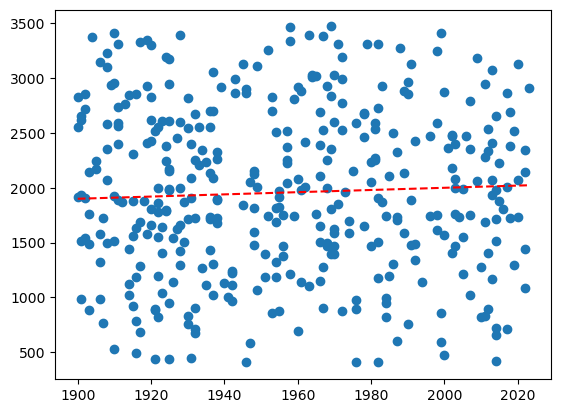

In [196]:
# Visualisaos
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()